# Датасет

https://archive.ics.uci.edu/dataset/19/car+evaluation

Лежит в `data/car_evaluation.csv`

In [1]:
import pandas as pd
col_names =['buying price', 'maintenance cost', 'number of doors', 
            'number of persons', 'lug_boot' ,'safety', 'decision']

df = pd.read_csv('../data/car_evaluation.csv', header=None, names=col_names)                
df                

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
d = {
    "low" : 1,
    "med" : 2,
    "high" : 3,
    "vhigh" : 4,
    "2" : 1,
    "3" : 2,
    "4" : 3,
    "5" : 4,
    "5more" : 4,
    "more" : 5,
    "small" : 1,
    "big" : 3,
}
for col in df.drop('decision', axis=1).columns:
    df[col] = df[col].map(d)

df.head(5)

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,4,4,1,1,1,1,unacc
1,4,4,1,1,1,2,unacc
2,4,4,1,1,1,3,unacc
3,4,4,1,1,2,1,unacc
4,4,4,1,1,2,2,unacc


In [3]:
d_decision = {
    "unacc" : -2,
    "acc" : -1,
    "good" : 1,
    "vgood" : 2
}
df['decision'] = df['decision'].map(d_decision)
df.head(5)

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,4,4,1,1,1,1,-2
1,4,4,1,1,1,2,-2
2,4,4,1,1,1,3,-2
3,4,4,1,1,2,1,-2
4,4,4,1,1,2,2,-2


- buying price - стоимость покупки
- maintenance cost - стоимость обслуживания
- number of doors - колличество дверей
- number of persons - колличество человек в машине
- lug_boot - размер багажного отделения
- safety - оценка безопасности машины
- decision - таргет метка


**Class Values:**

unacc, acc, good, vgood

**Attributes:**

- buying: vhigh, high, med, low.
- maint: vhigh, high, med, low.
- doors: 2, 3, 4, 5more.
- persons: 2, 4, more.
- lug_boot: small, med, big.
- safety: low, med, high.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
x = df.drop(columns=['decision'])
y = df['decision']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [6]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [7]:
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

train_accuracy = accuracy_score(train_prediction, y_train)
test_accuracy = accuracy_score(test_prediction, y_test)

print('Точность на обучающей выборке: ', train_accuracy)
print('Точность на тестовой выборке: ', test_accuracy)

Точность на обучающей выборке:  0.9985528219971056
Точность на тестовой выборке:  0.9653179190751445


In [8]:
mean_squared_error(test_prediction, y_test)

0.09248554913294797

# Посчитаем кросс-валидацию

In [9]:
def mse_scorer(estimator, x, y):
    return mean_squared_error(estimator.predict(x), y)

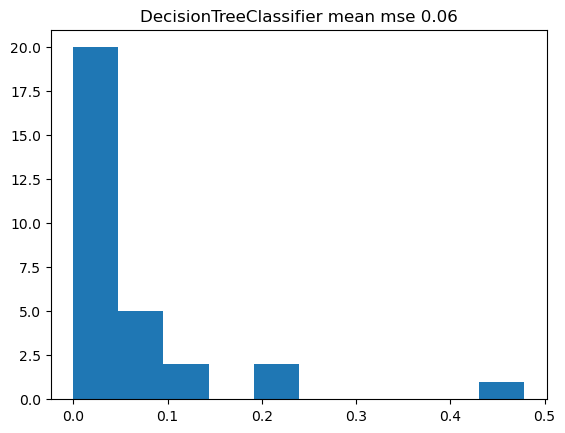

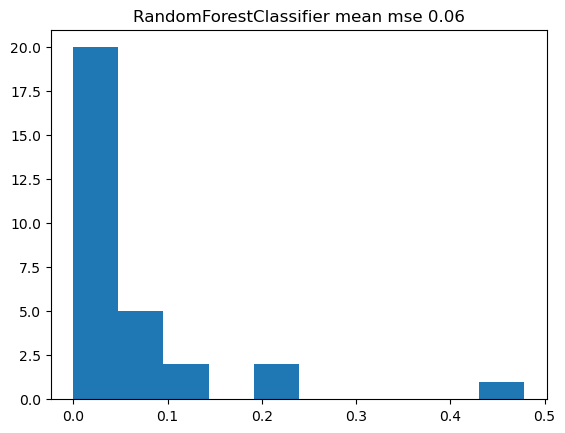

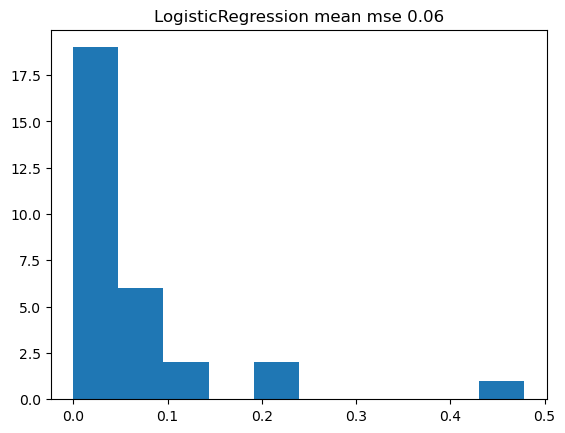

In [10]:
for model in [DecisionTreeClassifier(), RandomForestClassifier(100), LogisticRegression()]:
    scores = cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=30, scoring=mse_scorer)
    plt.figure()
    plt.hist(scores)
    plt.title(f'{model.__class__.__name__} mean mse {scores.mean():.2f}')

Разница небольшая, статзначимую разницу скорее всего не получим, модели работают примерно одинаково, берем любую какая больше нравится

# Пример стекинга

In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
estimators = [
    ('LogReg', LogisticRegression(max_iter=1000)),
    ('Tree', DecisionTreeClassifier())
]
clf=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))

In [12]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("accuracy = ", accuracy_score(y_pred, y_test))

accuracy =  0.9653179190751445


# Пример катбуста

In [13]:
! pip install catboost

In [14]:
from catboost import CatBoostClassifier

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score

x_train, x_test, y_train, y_test = train_test_split(df.drop('decision', axis=1), df['decision'])

model = CatBoostClassifier(metric_period=100)
model.fit(x_train, y_train, cat_features=x_train.columns.tolist())

Learning rate set to 0.08018
0:	learn: 1.2784773	total: 59.9ms	remaining: 59.9s
100:	learn: 0.1791260	total: 506ms	remaining: 4.5s
200:	learn: 0.1249961	total: 1s	remaining: 3.99s
300:	learn: 0.0919400	total: 1.52s	remaining: 3.53s
400:	learn: 0.0698144	total: 2.03s	remaining: 3.03s
500:	learn: 0.0547819	total: 2.54s	remaining: 2.53s
600:	learn: 0.0427443	total: 3.03s	remaining: 2.01s
700:	learn: 0.0344383	total: 3.52s	remaining: 1.5s
800:	learn: 0.0292093	total: 4.01s	remaining: 996ms
900:	learn: 0.0245475	total: 4.51s	remaining: 495ms
999:	learn: 0.0214369	total: 5s	remaining: 0us


In [16]:
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test), balanced_accuracy_score(y_pred, y_test)

(0.9930555555555556, 0.9916666666666667)